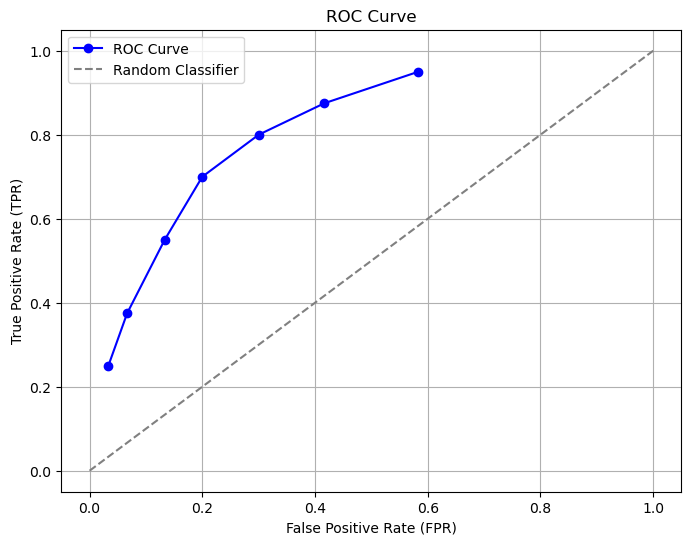

Area Under the Curve (AUC): 0.408


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Data from the problem statement
data = {
    "Threshold": [0.95, 0.85, 0.75, 0.65, 0.55, 0.45, 0.35],
    "TP": [10, 15, 22, 28, 32, 35, 38],
    "FP": [2, 4, 8, 12, 18, 25, 35],
    "TN": [58, 56, 52, 48, 42, 35, 25],
    "FN": [30, 25, 18, 12, 8, 5, 2]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate TPR and FPR
df['TPR'] = df['TP'] / (df['TP'] + df['FN'])
df['FPR'] = df['FP'] / (df['FP'] + df['TN'])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(df['FPR'], df['TPR'], marker='o', linestyle='-', color='b', label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Calculate AUC using trapezoidal rule
auc = 0
for i in range(len(df) - 1):
    fpr_diff = df.loc[i + 1, "FPR"] - df.loc[i, "FPR"]
    tpr_avg = (df.loc[i, "TPR"] + df.loc[i + 1, "TPR"]) / 2
    auc += fpr_diff * tpr_avg

print(f"Area Under the Curve (AUC): {auc:.3f}")


In [7]:
# Define the perceptron tree structure as a dictionary for easy reference
# Each entry in the dictionary represents weights for a leaf node perceptron
perceptrons = {
    "B0": {"C": 1, "D": -2, "E": 1, "F": 1},
    "B1": {"C": 0, "D": -3, "E": 1, "F": 2},
    "D0": {"B": -1, "C": 0, "E": -1, "F": 1},
    "D1": {"B": 1, "C": 0, "E": -1, "F": 1}
}

# Function to compute perceptron output based on weights and input values
def perceptron_output(weights, sample):
    # Bias term assumed as 1 for each perceptron (as stated in the problem)
    bias = 1
    result = bias
    for feature, weight in weights.items():
        result += weight * sample[feature]
    return 1 if result > 0 else -1

# Define samples with feature mappings for easy access
samples = {
    "a": {"A": 1, "B": 1, "C": 0, "D": 1, "E": 0, "F": 1},
    "b": {"A": 0, "B": 1, "C": 0, "D": 1, "E": 0, "F": 1}
}

# Classification process
outputs = {}
# Sample (a): x = (1, 1, 0, 1, 0, 1)
# Root node A = 1, so we move to node D
if samples["a"]["A"] == 1:
    # In node D, D = 1, so use perceptron D1
    outputs["a"] = perceptron_output(perceptrons["D1"], samples["a"])

# Sample (b): x = (0, 1, 0, 1, 0, 1)
# Root node A = 0, so we move to node B
if samples["b"]["A"] == 0:
    # In node B, B = 1, so use perceptron B1
    outputs["b"] = perceptron_output(perceptrons["B1"], samples["b"])

outputs


{'a': 1, 'b': -1}